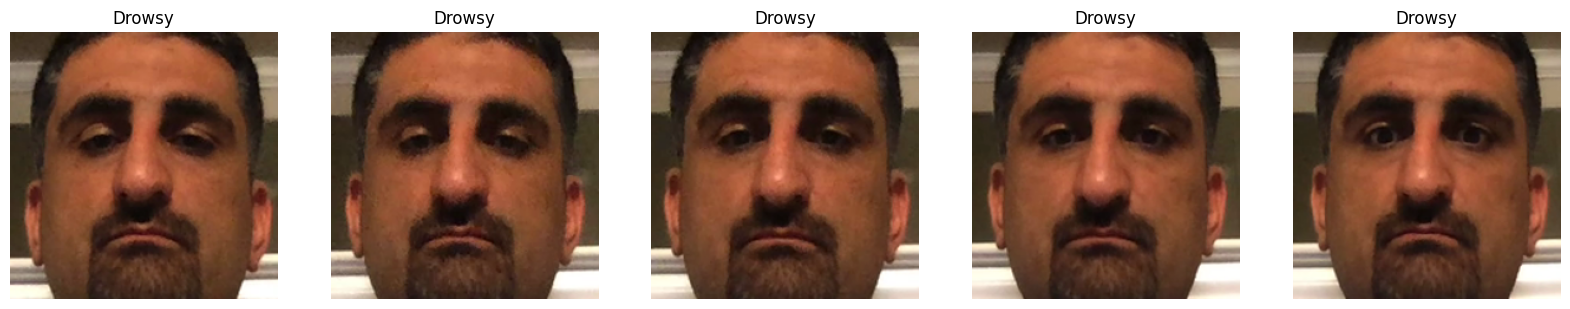

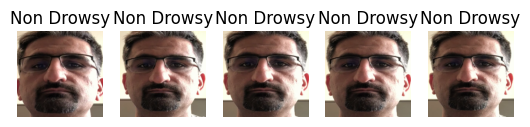

Total images loaded: 41793
Classes: ['Drowsy', 'Non Drowsy']


In [1]:
import os 
import cv2
import matplotlib.pyplot as plt

dataset_path = 'C://Users//Wei Tian Wong//OneDrive - Asia Pacific University//Degree Year 3//SEMESTER 2//Sem 2 Materials//ODL//Assignment//ODL_Assignment//Driver Drowsiness Dataset (DDD)'
image_dict = {}

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        image_dict[class_name] = []
        for filename in os.listdir(class_path):
            if filename.lower().endswith(('png')):
                img_path = os.path.join(class_path, filename)
                try:
                    img = cv2.imread(img_path)
                    if img is not None:
                        image_dict[class_name].append(img)
                    else:
                        print(f"Failed to load {img_path}")
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")

plt.figure(figsize=(20,10))
i = 0
for class_name, images in image_dict.items():
    for img in images[:5]:
        plt.subplot(len(image_dict), 5, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(class_name)
        plt.axis('off')
        i += 1
    plt.show()

total_images = sum(len(images) for images in image_dict.values())
print(f"Total images loaded: {total_images}")
print(f"Classes: {list(image_dict.keys())}")

1. Data Loading and visualization
2. Image size and shape
3. Colour channels (Grayscale vs RGB)
4. Class distribution (metadata)
5. Check if there any duplicated, missing or corrupted images
6. Compute basic statistic (mean, median, std) of pixel values - outliers and anomalies

In [2]:
print(f"Image for Drowsy class: shape={image_dict['Drowsy'][0].shape}")
print(f"Image for Non Drowsy class: shape={image_dict['Non Drowsy'][0].shape}")

Image for Drowsy class: shape=(227, 227, 3)
Image for Non Drowsy class: shape=(227, 227, 3)


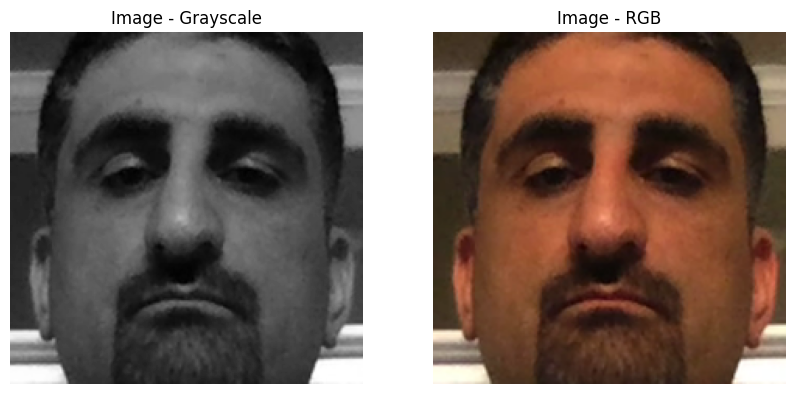

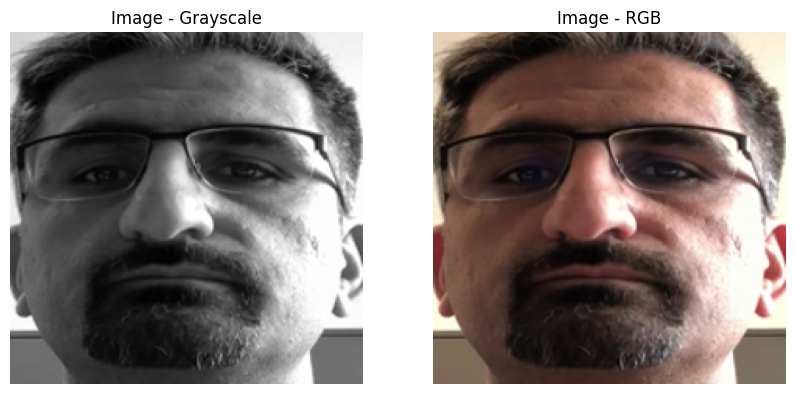

In [3]:
drowsy_image = image_dict['Drowsy'][0]
non_drowsy_image = image_dict['Non Drowsy'][0]

def display_image(image, title='Image'):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title(f"{title} - Grayscale")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(rgb_image)
    plt.title(f"{title} - RGB")
    plt.axis('off')    
    plt.show()

display_image(drowsy_image)
display_image(non_drowsy_image)

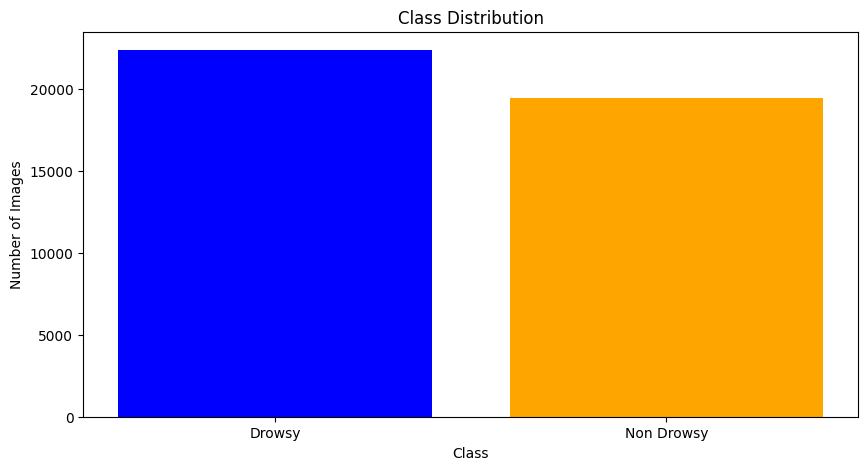

In [4]:
class_counts = {class_name: len(images) for class_name, images in image_dict.items()}

plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.show()

In [5]:
# to check if the image is corrupted
def is_image_corrupted(img):
    return img is None
    

corrupted_images = {}
for class_name, images in image_dict.items():
    corrupted_images[class_name] = []
    for img in images:
        if is_image_corrupted(img):
            corrupted_images[class_name].append(img)

print(corrupted_images)

{'Drowsy': [], 'Non Drowsy': []}


Dataset statistics:
Mean: 93.88433468532283
Median: 78.0
Standard Deviation: 64.56518694882928
Number of outliers: 0


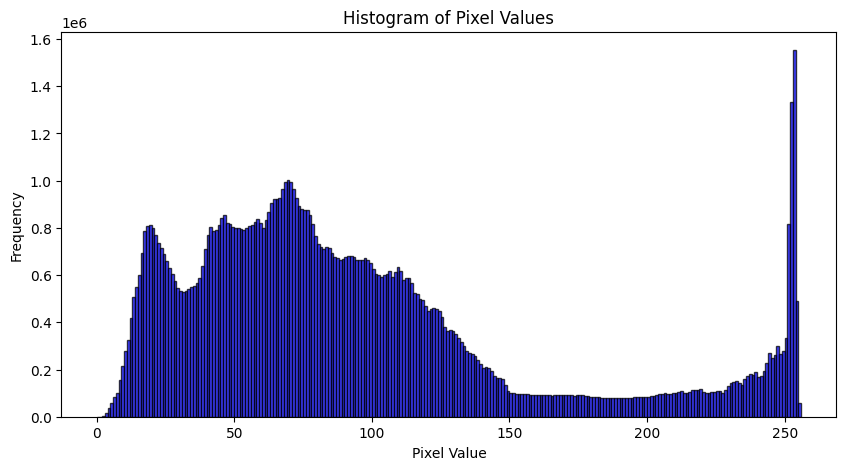

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

dataset_path = 'Driver Drowsiness Dataset (DDD)'
max_images_per_class = 1000

def compute_image_statistics(image):
    """Compute statistics for a single image."""
    return {
        'mean': np.mean(image),
        'median': np.median(image),
        'std_dev': np.std(image)
    }

def compute_dataset_statistics(image_paths):
    """Compute statistics for the entire dataset."""
    pixel_values = []
    for img_path in image_paths:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        if img is not None:
            pixel_values.extend(img.flatten())
        else:
            print(f"Failed to load image: {img_path}")
    pixel_values = np.array(pixel_values)
    return {
        'mean': np.mean(pixel_values),
        'median': np.median(pixel_values),
        'std_dev': np.std(pixel_values),
        'pixel_values': pixel_values  # Return pixel values for further processing
    }

def identify_outliers(pixel_values, mean, std_dev, threshold=3):
    """Identify outliers based on mean and standard deviation."""
    outliers = []
    for value in pixel_values:
        if abs(value - mean) > threshold * std_dev:
            outliers.append(value)
    return outliers

# Collect image paths
image_paths = []
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        class_image_paths = []
        image_count = 0
        for filename in os.listdir(class_path):
            if filename.lower().endswith(('png')):
                class_image_paths.append(os.path.join(class_path, filename))
                image_count += 1
                if image_count >= max_images_per_class:
                    break
        image_paths.extend(class_image_paths)

# Compute statistics for the dataset
dataset_stats = compute_dataset_statistics(image_paths)
print(f"Dataset statistics:\nMean: {dataset_stats['mean']}\nMedian: {dataset_stats['median']}\nStandard Deviation: {dataset_stats['std_dev']}")

# Identify outliers
outliers = identify_outliers(dataset_stats['pixel_values'], dataset_stats['mean'], dataset_stats['std_dev'])
print(f"Number of outliers: {len(outliers)}")

# Plot histogram of pixel values
plt.figure(figsize=(10, 5))
plt.hist(dataset_stats['pixel_values'], bins=256, range=(0, 256), alpha=0.75, color='blue', edgecolor='black')
plt.title('Histogram of Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()